# Importing TensorFlow

In [1]:
!nvidia-smi

Mon Jun 17 01:26:57 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.14              Driver Version: 550.54.14      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...    Off |   00000000:01:00.0  On |                  N/A |
| N/A   52C    P8              3W /  100W |    6207MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import tensorflow as tf
print(tf.__version__)

2024-06-17 01:26:58.083642: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-17 01:26:58.106081: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-17 01:26:58.106098: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-17 01:26:58.106699: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-17 01:26:58.110675: I tensorflow/core/platform/cpu_feature_guar

2.15.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing Data

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [5]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

We have 60k training, 10k testing samples in shape of (28,28)

In [6]:
x_train_tensor = tf.constant(x_train, dtype = tf.float32)
x_test_tensor = tf.constant(x_test, dtype = tf.float32)
y_train_tensor = tf.constant(y_train)
y_test_tensor = tf.constant(y_test)

2024-06-17 01:26:59.828618: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1191 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [7]:
x_train_tensor_rescaled = x_train_tensor / 255.
x_test_tensor_rescaled = x_test_tensor / 255.

| Label | Description |
|:-----:|-------------|
|   0   | T-shirt/top |
|   1   | Trouser     |
|   2   | Pullover    |
|   3   | Dress       |
|   4   | Coat        |
|   5   | Sandal      |
|   6   | Shirt       |
|   7   | Sneaker     |
|   8   | Bag         |
|   9   | Ankle boot  |

In [8]:
label_list = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

We have 10 unique labels.

In [9]:
tf.unique_with_counts(y_train_tensor)

UniqueWithCounts(y=<tf.Tensor: shape=(10,), dtype=uint8, numpy=array([9, 0, 3, 2, 7, 5, 1, 6, 4, 8], dtype=uint8)>, idx=<tf.Tensor: shape=(60000,), dtype=int32, numpy=array([0, 1, 1, ..., 2, 1, 5], dtype=int32)>, count=<tf.Tensor: shape=(10,), dtype=int32, numpy=
array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int32)>)

In [10]:
tf.unique_with_counts(y_test_tensor)

UniqueWithCounts(y=<tf.Tensor: shape=(10,), dtype=uint8, numpy=array([9, 2, 1, 6, 4, 5, 7, 3, 8, 0], dtype=uint8)>, idx=<tf.Tensor: shape=(10000,), dtype=int32, numpy=array([0, 1, 2, ..., 8, 2, 5], dtype=int32)>, count=<tf.Tensor: shape=(10,), dtype=int32, numpy=
array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
      dtype=int32)>)

Number of samples for each class for both test and train data is equal

# Creating and training the DNN model

In [11]:
dnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [12]:
dnn_model.compile(
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [13]:
dnn_history = dnn_model.fit(
    x = x_train_tensor_rescaled,
    y = y_train_tensor,
    validation_data = (x_test_tensor_rescaled, y_test_tensor),
    epochs = 50
)

Epoch 1/50


2024-06-17 01:27:00.572919: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-06-17 01:27:00.604244: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f46a14aac00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-17 01:27:00.604261: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-06-17 01:27:00.607882: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-17 01:27:00.620979: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1718576820.665852   57656 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 4s 2ms/step - loss: 0.4748 - accuracy: 0.8274 - val_loss: 0.4421 - val_accuracy: 0.8371
Epoch 2/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3615 - accuracy: 0.8678 - val_loss: 0.3981 - val_accuracy: 0.8576
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3270 - accuracy: 0.8785 - val_loss: 0.3671 - val_accuracy: 0.8695
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3032 - accuracy: 0.8866 - val_loss: 0.3577 - val_accuracy: 0.8700
Epoch 5/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2832 - accuracy: 0.8936 - val_loss: 0.3422 - val_accuracy: 0.8762
Epoch 6/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2683 - accuracy: 0.8986 - val_loss: 0.3602 - val_accuracy: 0.8757
Epoch 7/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2560 - accuracy: 0.9032 - val_loss: 0.3477 - val_accuracy: 0.8800
Epo

# Creating and training the CNN model


In [14]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28,28)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1)),
    tf.keras.layers.Conv2D(16, 3, 1, padding="valid", activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32, 3, 1, padding="valid", activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [15]:
cnn_model.compile(
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [16]:
cnn_history = cnn_model.fit(
    x = x_train_tensor_rescaled,
    y = y_train_tensor,
    validation_data = (x_test_tensor_rescaled, y_test_tensor),
    epochs = 50
)

Epoch 1/50


2024-06-17 01:29:19.734495: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1875/1875 [==============================] - 5s 2ms/step - loss: 0.5106 - accuracy: 0.8161 - val_loss: 0.3981 - val_accuracy: 0.8535
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3529 - accuracy: 0.8736 - val_loss: 0.3422 - val_accuracy: 0.8770
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3084 - accuracy: 0.8891 - val_loss: 0.3268 - val_accuracy: 0.8840
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2781 - accuracy: 0.8985 - val_loss: 0.2947 - val_accuracy: 0.8927
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2542 - accuracy: 0.9074 - val_loss: 0.2773 - val_accuracy: 0.8986
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2365 - accuracy: 0.9125 - val_loss: 0.3123 - val_accuracy: 0.8841
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2207 - accuracy: 0.9184 - val_loss: 0.2684 - val_accuracy: 0.9037
Epo

# Comparing DNN model and CNN model

In [17]:
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 512)               66048     
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 171658 (670.54 KB)
Trainable params: 171658 (670.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<Axes: >

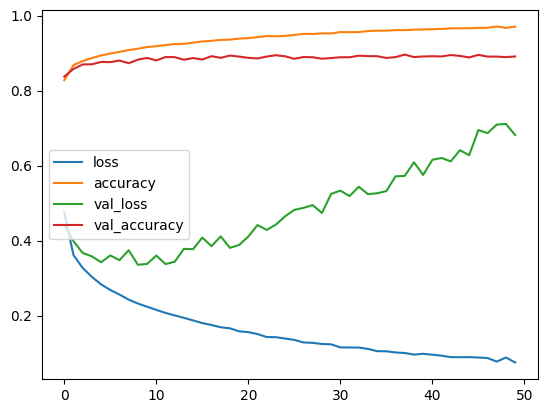

In [18]:
pd.DataFrame(dnn_history.history).plot()

In [19]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)              

<Axes: >

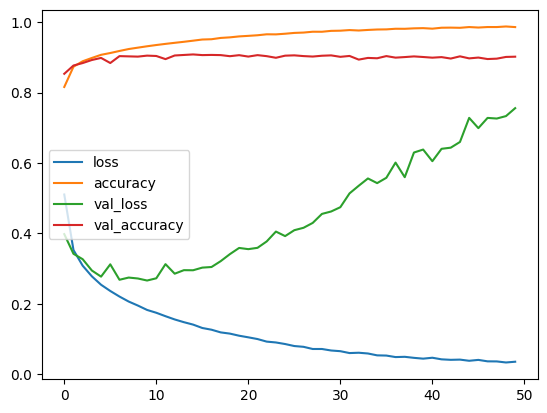

In [20]:
pd.DataFrame(cnn_history.history).plot()

In [21]:
%timeit
dnn_model_accuracy = dnn_model.evaluate(x_test_tensor_rescaled, y_test_tensor)[1]
cnn_model_accuracy = cnn_model.evaluate(x_test_tensor_rescaled, y_test_tensor)[1]
print(f"dnn_model val accuracy: {dnn_model_accuracy}\ncnn_model val accuracy: {cnn_model_accuracy}")
%timeit

313/313 [==============================] - 0s 863us/step - loss: 0.7559 - accuracy: 0.9021
dnn_model val accuracy: 0.8907999992370605
cnn_model val accuracy: 0.9021000266075134


# Improving CNN model

As we can see in the training loss curves of cnn_model, cnn_model started to overfit after apr. 10th epoch.

In [28]:
improved_cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28,28)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1)),
    tf.keras.layers.Conv2D(32, 3, 1, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, 3, 1, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, 3, 1, padding="same", activation="relu"),
    tf.keras.layers.Conv2D(128, 3, 1, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [29]:
improved_cnn_model.compile(
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ["accuracy"]
)

In [30]:
improved_cnn_history = improved_cnn_model.fit(
    x = x_train_tensor_rescaled,
    y = y_train_tensor,
    validation_data = (x_test_tensor_rescaled, y_test_tensor),
    epochs = 50
)

Epoch 1/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5995 - accuracy: 0.7790 - val_loss: 0.3804 - val_accuracy: 0.8592
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4277 - accuracy: 0.8431 - val_loss: 0.4254 - val_accuracy: 0.8403
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3842 - accuracy: 0.8590 - val_loss: 0.3161 - val_accuracy: 0.8878
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3611 - accuracy: 0.8693 - val_loss: 0.2921 - val_accuracy: 0.8874
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3503 - accuracy: 0.8710 - val_loss: 0.2927 - val_accuracy: 0.8930
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3332 - accuracy: 0.8794 - val_loss: 0.2870 - val_accuracy: 0.8913
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3240 - accuracy: 0.8812 - val_loss: 0.2984 - val_accuracy:

In [31]:
improved_cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_3 (Lambda)           (None, 28, 28, 1)         0         
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 7, 7, 64)         

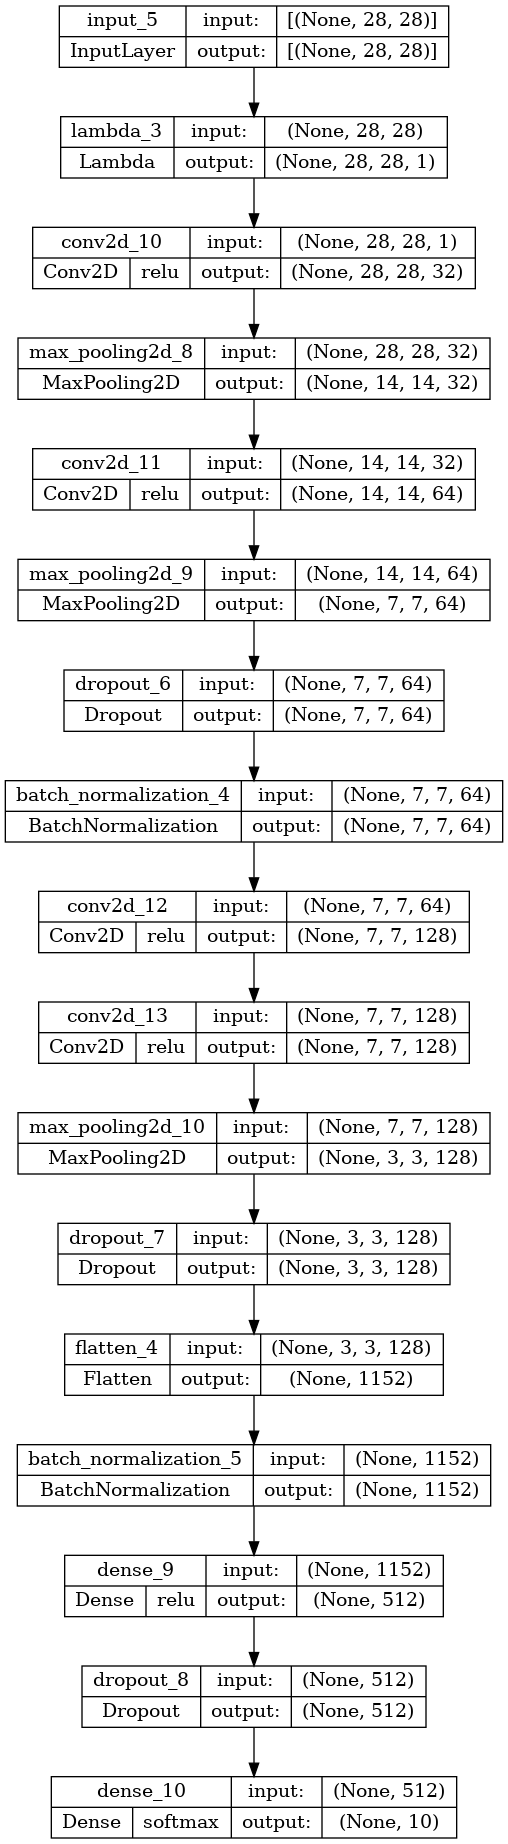

In [32]:
tf.keras.utils.plot_model(improved_cnn_model, show_shapes=True, show_layer_activations=True)

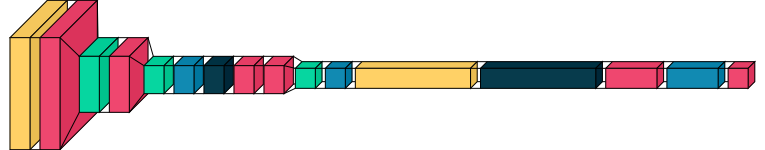

In [33]:
import visualkeras
visualkeras.layered_view(improved_cnn_model)

<Axes: >

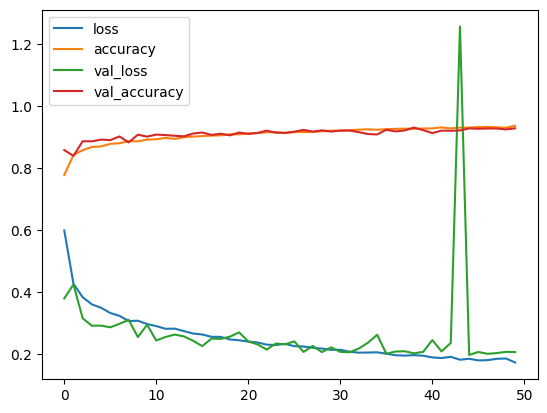

In [34]:
pd.DataFrame(improved_cnn_history.history).plot()

In [35]:
from sklearn.metrics import confusion_matrix
pred_probs = improved_cnn_model.predict(x_test_tensor_rescaled)
preds = pred_probs.argmax(axis=-1)
cm = confusion_matrix(y_test_tensor, preds)

313/313 [==============================] - 0s 1ms/step


In [36]:
cm

array([[878,   0,  16,   9,   4,   1,  87,   0,   5,   0],
       [  1, 987,   0,  10,   1,   0,   0,   0,   1,   0],
       [ 14,   1, 901,   8,  41,   0,  35,   0,   0,   0],
       [  8,   3,   7, 959,  14,   0,   9,   0,   0,   0],
       [  0,   0,  31,  28, 909,   0,  32,   0,   0,   0],
       [  0,   0,   0,   0,   0, 978,   0,  17,   0,   5],
       [ 91,   0,  50,  34,  82,   0, 740,   0,   3,   0],
       [  0,   0,   0,   0,   0,   1,   0, 984,   0,  15],
       [  4,   1,   0,   4,   2,   1,   0,   0, 988,   0],
       [  0,   0,   1,   0,   0,   3,   0,  26,   0, 970]])

In [37]:
cm_df = pd.DataFrame(data=cm)

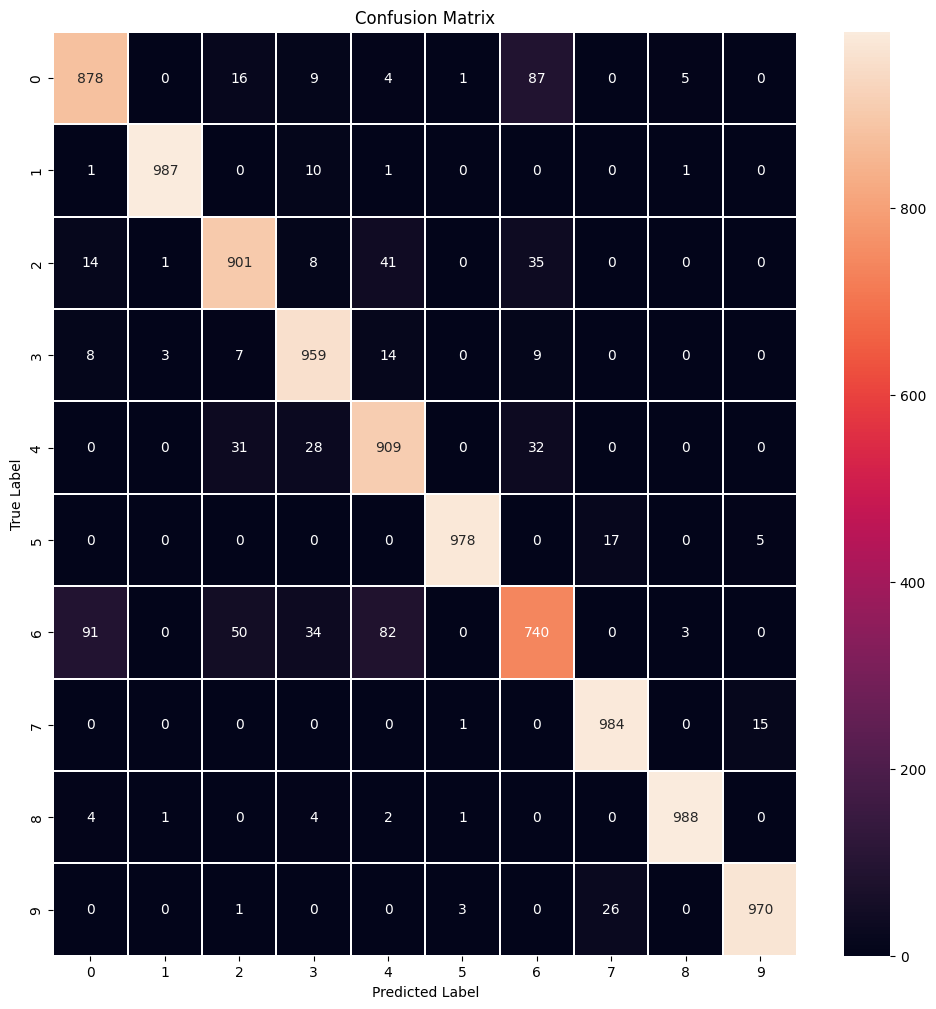

In [38]:
f,ax = plt.subplots(figsize = (12,12))
sns.heatmap(cm, annot=True, linewidths=0.1, cmap = "rocket", linecolor="white", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Summary

CNNs did not performed (significantly) better than DNNs for this problem.

Shapes of images may be the main reason for this result.

CNNs may perform better than DNNs in problems are classification of high resolution images.